In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import toeplitz
import scipy.stats
import math

ZADATAK 

Učitavanje podataka:

In [2]:
given_file = open('FinalVector1.txt', 'r')

lines = given_file.readlines()

given_file.close()

vector_1=np.zeros(51);
for i in range(51):
        vector_1[i]=float(lines[i])

In [3]:
vector_1

array([1.92961969, 2.16903693, 2.55523534, 2.84374028, 2.837359  ,
       2.98079735, 3.06441769, 3.04821442, 3.15878732, 3.08480359,
       2.96577109, 2.86298776, 2.70374608, 2.655887  , 2.4956825 ,
       2.44101974, 2.31729617, 2.34337917, 2.22766082, 2.32680674,
       2.26595282, 2.35705599, 2.5668216 , 2.61468307, 2.99832192,
       3.18423223, 3.56667434, 3.96891523, 4.3873518 , 4.74199529,
       5.15943   , 5.53212572, 5.79704917, 6.00778435, 6.13872273,
       6.18556891, 5.98143718, 5.86285128, 5.68207877, 5.20123888,
       4.95610896, 4.474714  , 4.04136263, 3.59968694, 3.21397448,
       2.8737981 , 2.39306496, 2.13222149, 1.79435978, 1.46087745,
       1.13764823])

In [4]:
given_file = open('FinalVector2.txt', 'r')

lines = given_file.readlines()

given_file.close()

vector_2=np.zeros(51);
for i in range(51):
        vector_2[i]=float(lines[i])

In [5]:
given_file = open('FinalVector3.txt', 'r')

lines = given_file.readlines()

given_file.close()

vector_3=np.zeros(51);
for i in range(51):
        vector_3[i]=float(lines[i])

In [6]:
given_file = open('FinalVector4.txt', 'r')

lines = given_file.readlines()

given_file.close()

vector_4=np.zeros(51);
for i in range(51):
        vector_4[i]=float(lines[i])

In [7]:
given_file = open('FinalVector5.txt', 'r')

lines = given_file.readlines()

#for line in lines:
  #  for c in line:
      #  if c.isdigit() == True:
      #      print('Integer found : {}'.format(c))

given_file.close()

vector_5=np.zeros(51);
for i in range(51):
        vector_5[i]=float(lines[i])

Učitavanje Kernela i formiranje matrice A:

In [8]:
given_file = open('Kernel1.txt', 'r')

lines = given_file.readlines()

given_file.close()

kernel=np.zeros(51);
for i in range(51):
        kernel[i]=float(lines[i])
        
H = toeplitz(kernel)

In [9]:
#pd.DataFrame(H)

Metoda regularizacije za FinalVector1 i R(x)=||delta(x)||2,2

In [10]:
#Matrica I s 1 na dijagonali i -1 na sporednoj donjoj dijagonali
I=np.eye(51)
for i in range(50):
    I[i+1,i]=-1

In [11]:
#Sada cemo procijeniti najbolji I na način da smanjimo R(x)
vector_1_zeros=np.concatenate((vector_1,np.transpose(np.zeros(51))))
R=100000
argument=0
for i in range(50):
    I[i,:]=0
    I[i+1,:]=0
    A=np.concatenate((H,I))
    A_inv=np.linalg.pinv(A)
    x_1=np.dot(A_inv,vector_1_zeros)
    mini=np.linalg.norm(np.dot(I,x_1))
    if (R > mini):
        R=mini
        argument=i
    I=np.eye(51)
    for j in range(50):
        I[j+1,j]=-1
    
I[argument,:]=0
I[argument+1,:]=0
A=np.concatenate((H,I))
A_inv=np.linalg.pinv(A)
x_1=np.dot(A_inv,vector_1_zeros)
x_1

array([ 0.68971297,  1.2568385 ,  1.69712874,  2.0119482 ,  2.20838291,
        2.2986762 ,  2.29907552,  2.22828188,  2.10575761,  1.95015566,
        1.77808743,  1.60336236,  1.43673258,  1.28608192,  1.15692757,
        1.05306356,  0.97717145,  0.93125252,  0.91679111,  0.93463097,
        0.98462175,  1.06515758,  1.17276827,  1.30192601,  1.4451923 ,
        1.59375721,  1.73832936,  1.87024312,  1.98258014,  2.07107622,
        2.13460998,  2.17514534,  2.19711032,  2.20631566,  2.20862135,
       19.0549981 ,  1.9649743 ,  1.96448151,  1.9603206 ,  1.94735934,
        1.91969975,  1.8720945 ,  1.80130344,  1.70712074,  1.59287386,
        1.46530431,  1.3338636 ,  1.20956809,  1.10363321,  1.02613426,
        0.98491745])

In [12]:
i = np.arange(0,51,1)
Hx_1=np.dot(H,x_1)
plt.plot(i, Hx_1, color="green")
plt.plot(i, x_1,color="red")
plt.plot(i, vector_1, color="blue")

In [13]:
np.savetxt('x_1.txt', x_1, fmt='%1.4e')

Metoda regularizacije za FinalVector3 i R(x)=||delta(x)||2,2

In [14]:
#Matrica I s 1 na dijagonali i -1 na sporednoj donjoj dijagonali
I=np.eye(51)
for i in range(50):
    I[i+1,i]=-1
#Sada cemo procijeniti najbolji I na način da smanjimo R(x)
vector_3_zeros=np.concatenate((vector_3,np.transpose(np.zeros(51))))
R=100000
l=0.1
k=5
argument=0
for i in range(50-k):
    I[i,:]=0
    I[i+1,:]=0
    I[i+k,:]=0
    I[i+k+1,:]=0
    A=np.concatenate((H,l*I))
    A_inv=np.linalg.pinv(A)
    x_3=np.dot(A_inv,vector_3_zeros)
    mini=np.linalg.norm(np.dot(I,x_3))
    if (R > mini):
        R=mini
        argument=i
    I=np.eye(51)
    for j in range(50):
        I[j+1,j]=-1
    
I[argument,:]=0
I[argument+1,:]=0
I[argument+k,:]=0
I[argument+k+1,:]=0
A=np.concatenate((H,l*I))
A_inv=np.linalg.pinv(A)
x_3=np.dot(A_inv,vector_3_zeros)
x_3

array([ 0.01258791,  0.07348458,  0.15521656,  0.23554495,  0.29944056,
        0.33910988,  0.35256864,  0.34170675,  0.31074652,  0.26551249,
        0.21329221,  0.16263717,  0.12247747,  0.10038434,  0.10044566,
        0.12165288,  0.15767129,  0.19836243,  0.23268322,  0.25196333,
        0.25236083,  0.23561179,  0.20787495,  0.17721889,  0.15078581,
        0.13270482,  0.12343226,  0.12056288,  0.37675047, -0.53159583,
       -0.53273586, -0.534476  , -0.53560498,  1.38969073, -0.44066488,
       -0.44340106, -0.45206928, -0.46850888, -0.49156044, -0.51649631,
       -0.53606571, -0.54303186, -0.53336395, -0.50879258, -0.4774806 ,
       -0.45214128, -0.44586326, -0.46681685, -0.51354377, -0.57244336,
       -0.6183875 ])

In [15]:
i = np.arange(0,51,1)
plt.plot(i, x_3, color="green")

In [16]:
np.savetxt('x_3.txt', x_3, fmt='%1.4e')

Metoda regularizacije za FinalVector5 i R(x)=||x||2,2

In [17]:
#Matrica I s 1 na dijagonali i -1 na sporednoj donjoj dijagonali
I=np.eye(51)
l=0.5
vector_5_zeros=np.concatenate((vector_5,np.transpose(np.zeros(51))))
A=np.concatenate((H,l*I))
A_inv=np.linalg.pinv(A)
x_5=np.dot(A_inv,vector_5_zeros)
x_5

array([ 0.5754884 ,  0.6692709 ,  0.75962686,  0.84308138,  0.91661938,
        0.97767991,  1.02397095,  1.05317341,  1.06263633,  1.04916903,
        1.00901271,  0.93803544,  0.83215259,  0.68793745,  0.50335587,
        0.27853396,  0.01644813, -0.27658411, -0.59072969, -0.91287286,
       -1.22729704, -1.51679023, -1.76407531, -1.95340353, -2.07211024,
       -2.11192584, -2.06986406, -1.94856662, -1.75605904, -1.50495207,
       -1.21119464, -0.89253809, -0.56690098, -0.25082726,  0.04179075,
        0.30059463,  0.51917308,  0.69499405,  0.82890543,  0.92430813,
        0.9861462 ,  1.01987973,  1.03060343,  1.02244384,  0.99831226,
        0.96001682,  0.90866018,  0.84518745,  0.77092026,  0.68792632,
        0.59912813])

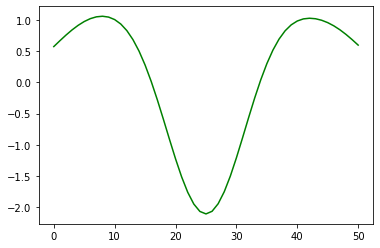

In [18]:
i = np.arange(0,51,1)
plt.plot(i, x_5, color="green")

In [19]:
np.savetxt('x_5.txt', x_5, fmt='%1.4e')